This example is used by IGV Web (https://igv.org/app/).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipympl
import pysam

import lakeview as lv

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 72

## Download data

In [2]:
REGION = "17:64040802-64045633"

ILLUMINA_BAM_PATH = "data/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"

ILLUMINA_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam"
ILLUMINA_BAI_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/SKBR3_550bp_pcrFREE_S1_L001_AND_L002_R1_001.101bp.bwamem.ill.mapped.sort.bam.bai"

PACBIO_BAM_PATH = "data/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam"
PACBIO_BAM_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam"
PACBIO_BAI_URL = "https://s3.amazonaws.com/igv.org.demo/SKBR3/reads_lr_skbr3.fa_ngmlr-0.2.3_mapped.bam.bai"


lv.helpers.download_bam(ILLUMINA_BAM_URL, ILLUMINA_BAI_URL, REGION, ILLUMINA_BAM_PATH)
lv.helpers.download_bam(PACBIO_BAM_URL, PACBIO_BAI_URL, REGION, PACBIO_BAM_PATH)


## Load data

In [3]:
illumina_painter = lv.SequenceAlignment.from_file(ILLUMINA_BAM_PATH, "rb")
pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, "rb")

In [4]:
%matplotlib inline
plt.ioff()

gv = lv.GenomeViewer(4, figsize=(12, 15), height_ratios=(1, 8, 1, 8))

illumina_painter.draw_pileup(gv.axes[0])
illumina_painter.draw_alignment(
    gv.axes[1],
    color_by=lambda segment: "lightgray" if segment.is_proper_pair else "firebrick",
    group_by="strand",
    max_depth=30,
)
pacbio_painter.draw_pileup(gv.axes[2])
pacbio_painter.draw_alignment(gv.axes[3])
gv.set_xlim(64040802, 64045633)

gv.axes[1].set_ylabel("Illumina")
gv.axes[3].set_ylabel("PacBio")

/workspace/lakeview/src/lakeview/widget.py:54: UserWarning: Backend ipympl not activated. Current backend: module://matplotlib_inline.backend_inline. To enable additional interactive functionality, please activate ipympl using `%matplotlib widget`.
  warn(


Text(3.1999999999999993, 0.5, 'PacBio')

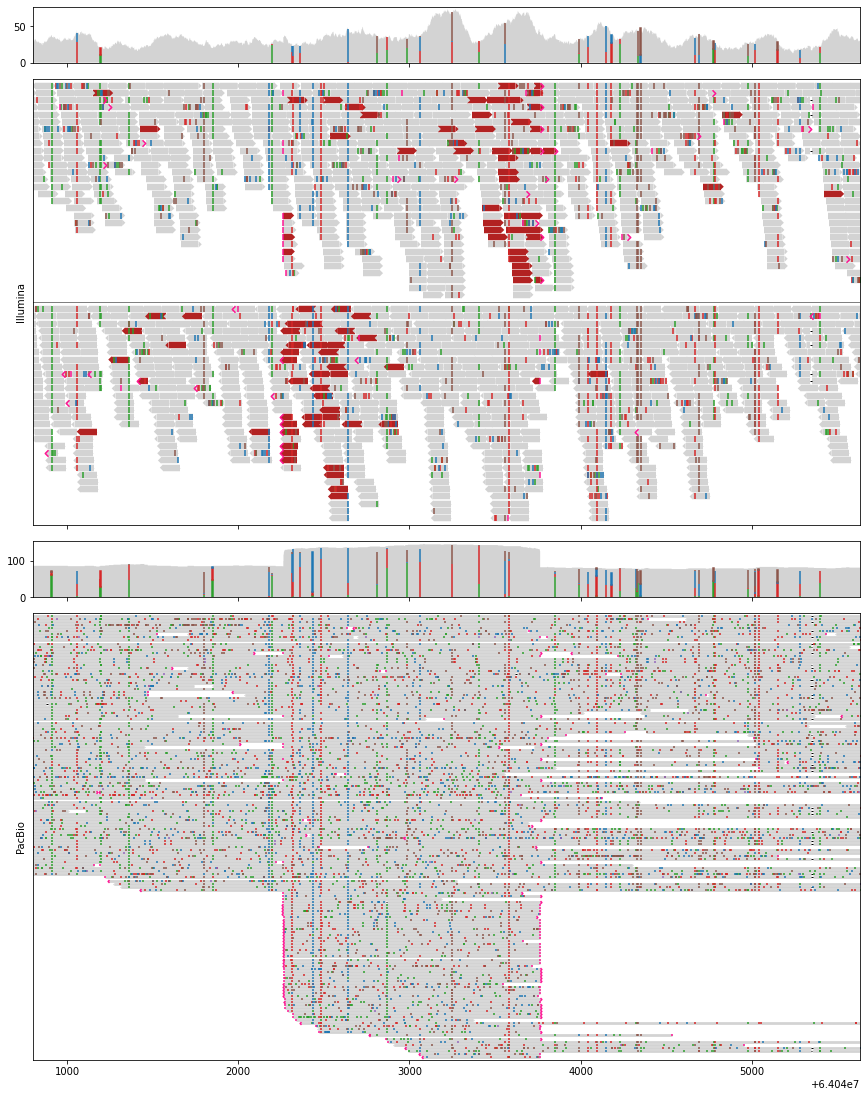

In [5]:
gv.figure